1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Setup

In [2]:
pd.set_option("display.max_colwidth", 120)
plt.rcParams["figure.figsize"] = (9, 5)

3. Load dataset

In [3]:
STRICT_PATH = "../data/processed/netflix_merged_strict_only.csv"
df = pd.read_csv(STRICT_PATH)

4. Basic info and shape

In [4]:
print(df.shape)
df.head()

(3074, 20)


,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,title_norm,join_year,director,cast,country,date_added,rating,duration,listed_in
0,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Si...",1975,PG,91,tt0071853,8.2,530877.0,monty python and the holy grail,1975.0,"Terry Gilliam, Terry Jones","Graham Chapman, John Cleese, Eric Idle, Terry Gilliam, Terry Jones, Michael Palin, Connie Booth, Carol Cleveland, Ne...",United Kingdom,"January 2, 2019",PG,92 min,"Action & Adventure, Classic Movies, Comedies"
1,6,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wager that he can take a flower girl and make her presentable in high soc...,1964,G,170,tt0058385,7.8,94121.0,my fair lady,1964.0,George Cukor,"Audrey Hepburn, Rex Harrison, Stanley Holloway, Wilfred Hyde-White, Gladys Cooper, Jeremy Brett, Theodore Bikel, Mon...",United States,"April 1, 2021",G,173 min,"Classic Movies, Music & Musicals"
2,7,tm98978,The Blue Lagoon,MOVIE,"Two small children and a ship's cook survive a shipwreck and find safety on an idyllic tropical island. Soon, howeve...",1980,R,104,tt0080453,5.8,69053.0,the blue lagoon,1980.0,Randal Kleiser,"Brooke Shields, Christopher Atkins, Leo McKern, William Daniels, Elva Josephson, Glenn Kohan, Alan Hopgood, Gus Merc...",United States,"September 1, 2021",R,105 min,"Dramas, Romantic Movies"
3,8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker falls in love with an ex-con named Clyde Barrow and together they start a...",1967,R,110,tt0061418,7.7,111189.0,bonnie and clyde,1967.0,Arthur Penn,"Warren Beatty, Faye Dunaway, Michael J. Pollard, Gene Hackman, Estelle Parsons, Denver Pyle, Dub Taylor, Evans Evans...",United States,"January 1, 2021",R,111 min,"Action & Adventure, Classic Movies, Dramas"
4,10,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an impossible mission: infiltrate an impregnable Nazi-held island and destro...,1961,NaN,158,tt0054953,7.5,50150.0,the guns of navarone,1961.0,J. Lee Thompson,"Gregory Peck, David Niven, Anthony Quinn, Stanley Baker, Anthony Quayle, James Darren, Irene Papas, Gia Scala, James...","United Kingdom, United States","September 1, 2021",TV-14,156 min,"Action & Adventure, Classic Movies"


5. Quick Overview

In [5]:
print("Columns:", list(df.columns), "\n")
print("dtypes:\n", df.dtypes, "\n")
print("Missing values:\n", df.isna().sum().sort_values(ascending=False), "\n")
print("Duplicates (by id or title+year):")
print(" - by id:", df.duplicated(subset=["id"]).sum() if "id" in df.columns else "no id col")
print(" - by title+release_year:", df.duplicated(subset=["title","release_year"]).sum())

Columns: ['index', 'id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes', 'title_norm', 'join_year', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in'] 

dtypes:
 index                  int64
id                    object
title                 object
type                  object
description           object
release_year           int64
age_certification     object
runtime                int64
imdb_id               object
imdb_score           float64
imdb_votes           float64
title_norm            object
join_year            float64
director              object
cast                  object
country               object
date_added            object
rating                object
duration              object
listed_in             object
dtype: object 

Missing values:
 age_certification    1487
director              856
cast                  294
country               247
imdb_votes           

•	Missing Values:

	•	age_certification is missing for ~48% of rows → this could impact age-based analyses or ratings predictions.
	•	director, cast, country also have significant missingness, but that’s expected since not all IMDb rows have full metadata.
	•	imdb_votes has only 5 missing values → negligible.
	•	description only 2 missing → not a major issue.
	•	duration has just 1 missing → easily fixable.
•	Duplicates:

	•	Only 2 duplicates by title+release_year → easy to clean.

6. Target & Key Numerics

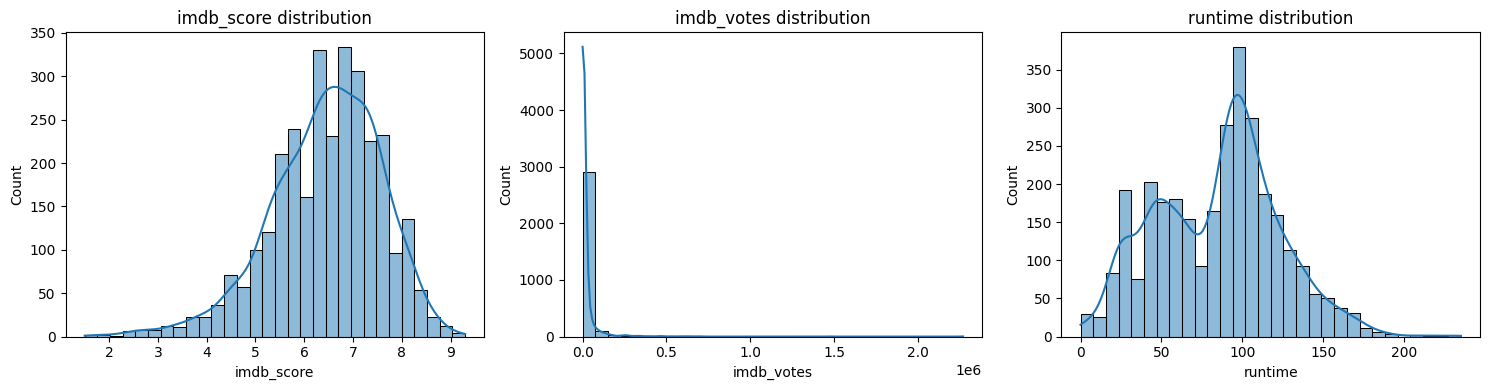

,imdb_score,imdb_votes,runtime
count,3074.000000,3.069000e+03,3074.000000
mean,6.447137,1.814258e+04,84.849707
std,1.130654,7.277060e+04,38.016201
min,1.500000,5.000000e+00,0.000000
25%,5.800000,5.720000e+02,53.000000
50%,6.600000,2.354000e+03,91.000000
75%,7.300000,9.108000e+03,109.000000
max,9.300000,2.268288e+06,235.000000


In [6]:
num_cols = ["imdb_score","imdb_votes","runtime"]
num_cols = [c for c in num_cols if c in df.columns]

fig, axes = plt.subplots(1, len(num_cols), figsize=(5*len(num_cols), 4))
if len(num_cols) == 1: axes = [axes]
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=ax)
    ax.set_title(f"{col} distribution")
plt.tight_layout()
plt.show()

df[num_cols].describe()

•	IMDB Score:

	•	Fairly normal distribution centered around 6.4–6.5 with a few high-rated titles up to 9.3.
	•	This range is typical for IMDb, so no major bias.
•	IMDB Votes:

	•	Extremely right-skewed: most titles have very few votes, but a few blockbuster titles have millions.
	•	Log transformation (imdb_votes_log1p) helps normalizing.
•	Runtime:

	•	Peaks around 90–100 min for movies; shows add small runtimes near 30 min.

7. Categorical Distributions

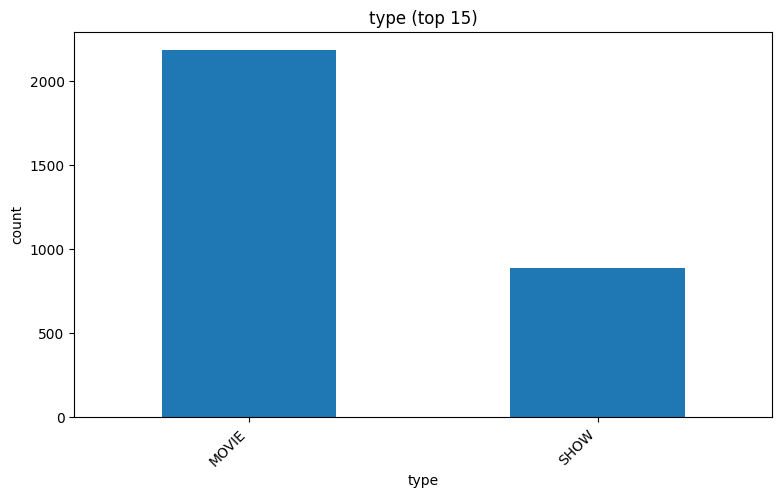

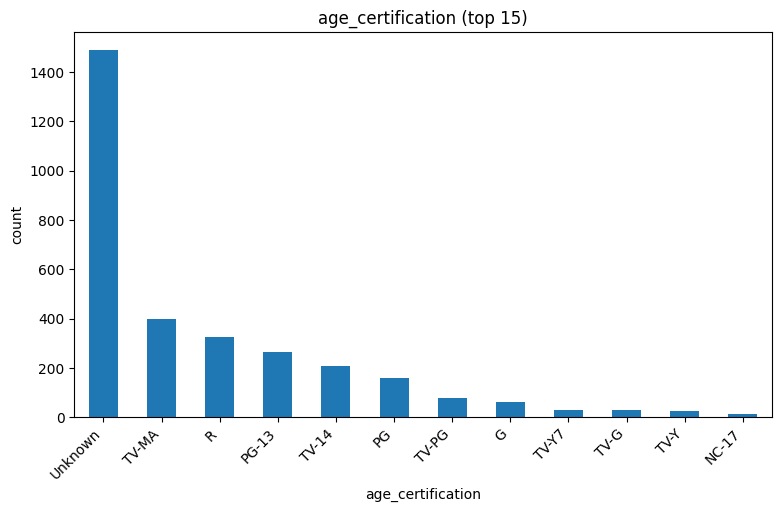

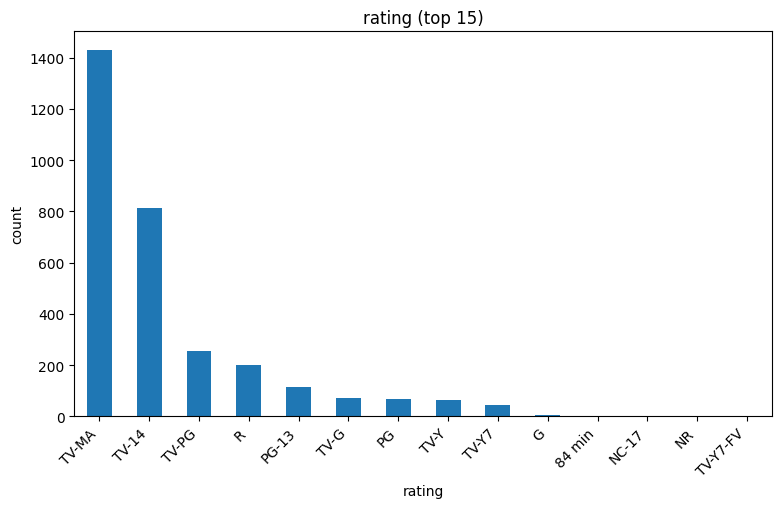

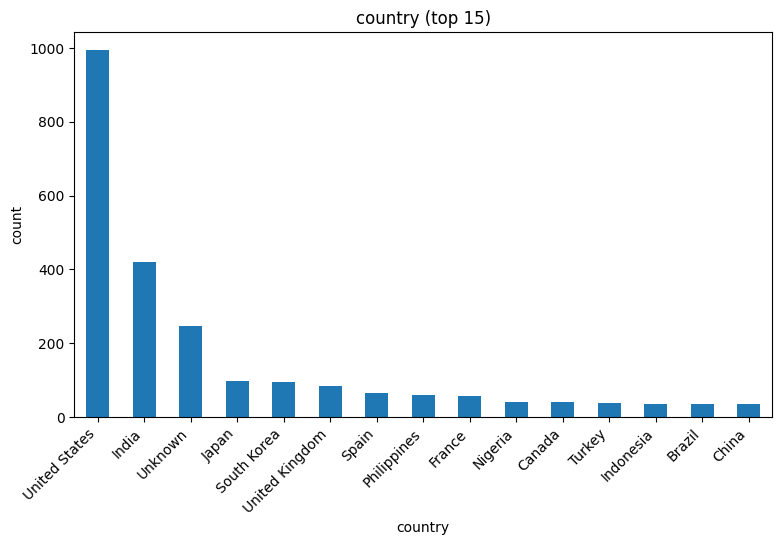

In [7]:
cat_cols = []
for c in ["type","age_certification","rating","country"]:
    if c in df.columns:
        cat_cols.append(c)

for c in cat_cols:
    vc = df[c].fillna("Unknown").value_counts().head(15)
    ax = vc.plot(kind="bar")
    ax.set_title(f"{c} (top 15)")
    ax.set_ylabel("count")
    plt.xticks(rotation=45, ha="right")
    plt.show()

•	Type:

	•	More movies (~2200) than shows (~900).

•	Age Certification:

	•	Many “Unknown” entries → will need imputation or a separate “unknown” category.

•	Rating:

	•	TV ratings dominate (TV-MA, TV-14).

•	Country:

	•	Strong U.S. dominance, then India, then “Unknown”.
	•	Interesting mix of global content.

8. Year/Time Trends

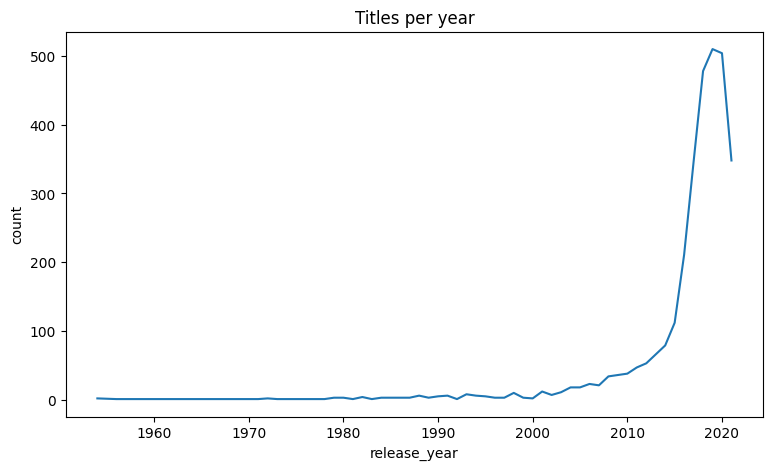

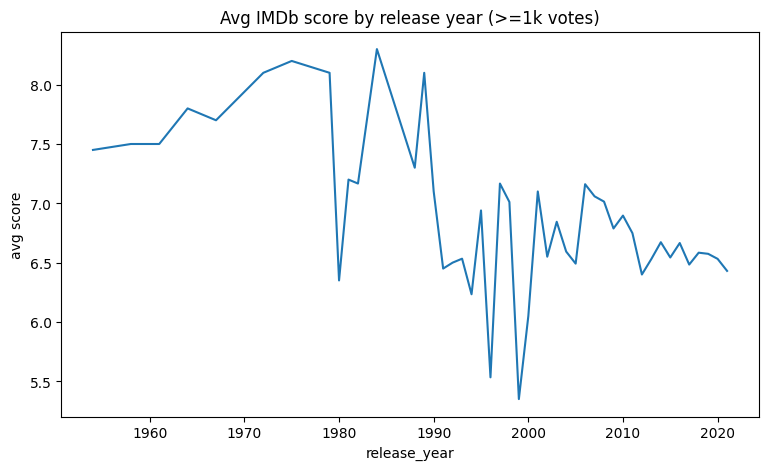

In [8]:
if "release_year" in df.columns:
    ax = df["release_year"].value_counts().sort_index().plot()
    ax.set_title("Titles per year")
    ax.set_ylabel("count")
    plt.show()

    # Average score by year (only if enough votes)
    if {"imdb_score","imdb_votes"}.issubset(df.columns):
        tmp = df[df["imdb_votes"].fillna(0) >= 1000]  # avoid noisy low-vote items
        avg_by_year = tmp.groupby("release_year")["imdb_score"].mean()
        ax = avg_by_year.plot()
        ax.set_title("Avg IMDb score by release year (>=1k votes)")
        ax.set_ylabel("avg score")
        plt.show()

•	Titles per Year:

	•	Big spike post-2010, especially 2015–2020.
	•	Drop after 2020 may reflect incomplete recent data or COVID-19 effects.
    
•	IMDb Score by Year:

	•	Older titles (60s–80s) tend to have higher average scores.
	•	Recent years see more mid-range scores (~6–7). This may be due to rating inflation for classics or harsher audience standards today.

9. Correlations (numeric-only)

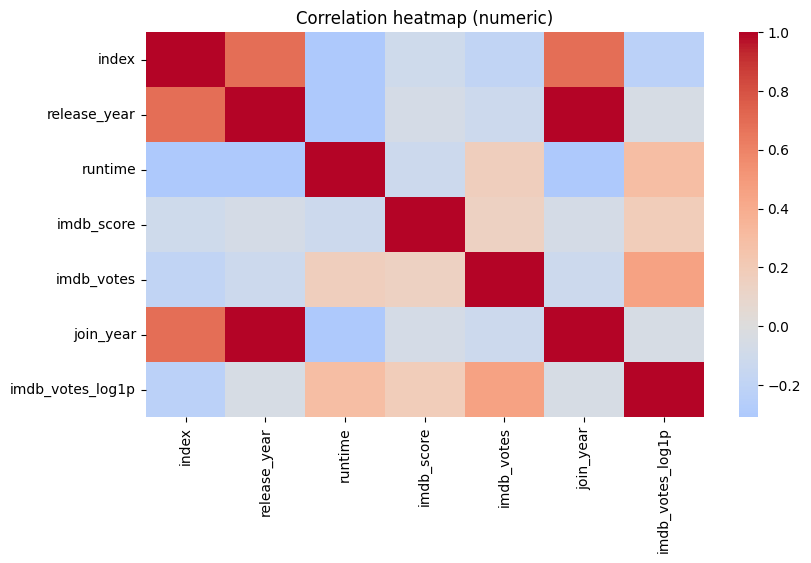

,corr_with_imdb_score
imdb_votes_log1p,0.183811
imdb_votes,0.150087
release_year,-0.059603
join_year,-0.059603
index,-0.108818
runtime,-0.118616


In [9]:
keep_numeric = df.select_dtypes(include=[np.number]).copy()

# Optional: winsorize imdb_votes to reduce extreme influence in plots
if "imdb_votes" in keep_numeric.columns:
    keep_numeric["imdb_votes_log1p"] = np.log1p(keep_numeric["imdb_votes"])

corr = keep_numeric.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation heatmap (numeric)")
plt.show()

# Top correlations with imdb_score
if "imdb_score" in keep_numeric.columns:
    top_corr = corr["imdb_score"].drop(labels=["imdb_score"]).sort_values(ascending=False)
    display(top_corr.head(10).to_frame("corr_with_imdb_score"))

•	Highest correlation with score is imdb_votes_log1p (~0.18).

	•	This is weak but expected: more votes often means more visibility, not necessarily higher quality.

•	Runtime is slightly negative with score (~ -0.12) → very long or very short runtimes might be less well-received.

•	Release Year correlation with score is slightly negative (~ -0.06) → older titles slightly higher scores.

10. Score vs. Features (scatter/box)

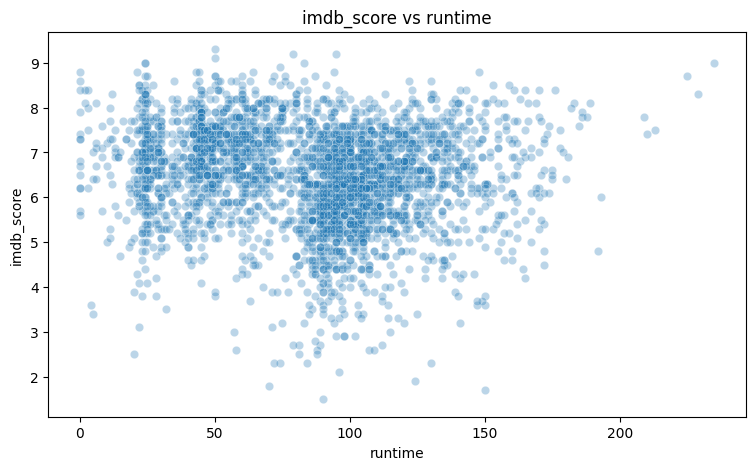

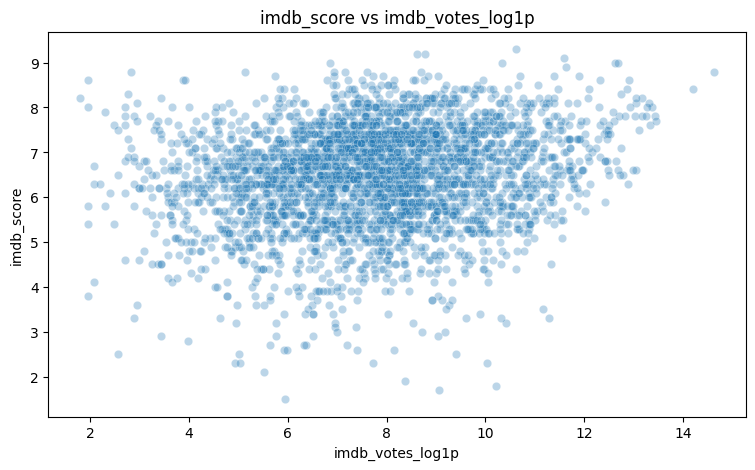

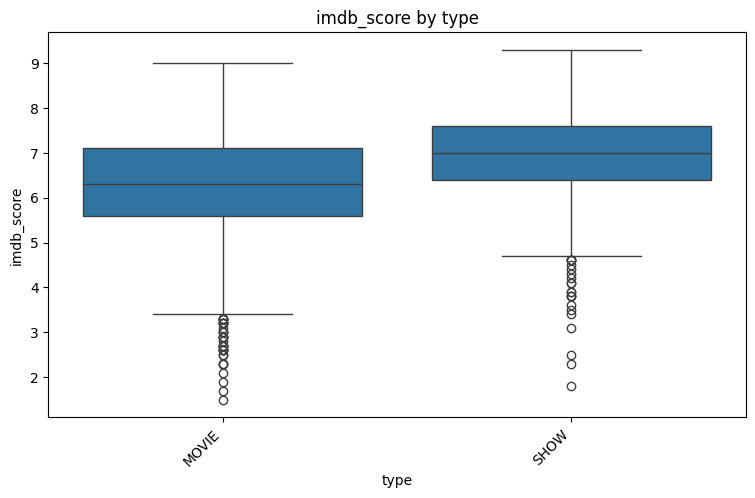

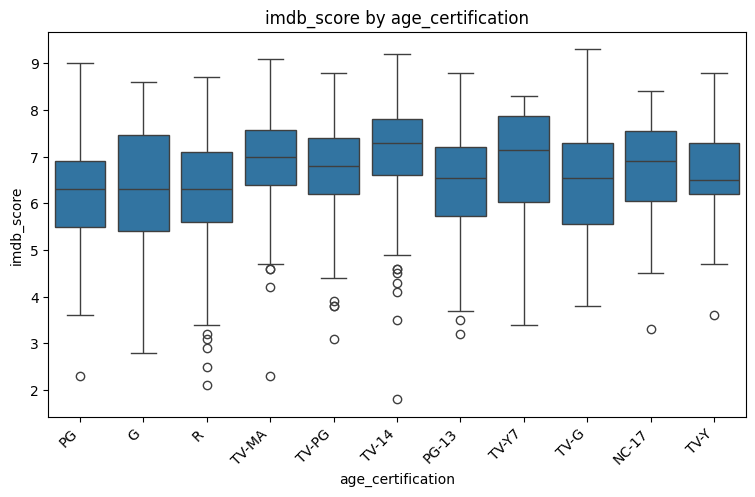

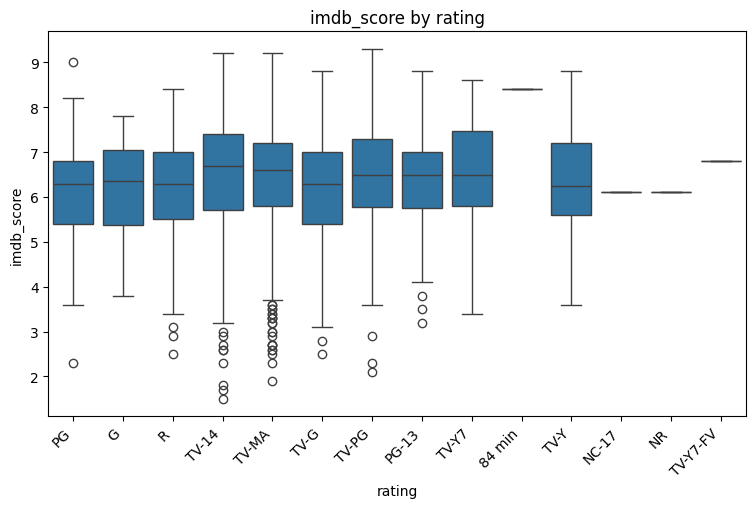

In [10]:
# imdb_score vs runtime / votes
pairs = []
if {"imdb_score","runtime"}.issubset(df.columns):      pairs.append(("runtime","imdb_score"))
if {"imdb_score","imdb_votes"}.issubset(df.columns):   pairs.append(("imdb_votes","imdb_score"))

for x,y in pairs:
    data = df[[x,y]].dropna().copy()
    if x == "imdb_votes":
        data["imdb_votes_log1p"] = np.log1p(data["imdb_votes"])
        x_plot = "imdb_votes_log1p"
    else:
        x_plot = x

    sns.scatterplot(data=data, x=x_plot, y=y, alpha=0.3)
    plt.title(f"{y} vs {x_plot}")
    plt.show()

# imdb_score by type/age_certification (if exist)
for c in ["type","age_certification","rating"]:
    if {"imdb_score", c}.issubset(df.columns):
        sns.boxplot(data=df, x=c, y="imdb_score")
        plt.title(f"imdb_score by {c}")
        plt.xticks(rotation=45, ha="right")
        plt.show()

1.	Score vs Runtime:

	•	No clear linear relationship; wide spread across runtimes.

2.	Score vs IMDb Votes (log):

	•	Slight upward trend: popular titles tend to have better ratings, but many exceptions.

3.	IMDb Score by Type:

	•	Movies and Shows have similar medians (~6.5–7), but:

		•	Shows seem to have slightly higher median scores.
		•	Movies have a larger spread on the lower end (more low-rated outliers).
		•	Interpretation: Shows might be more consistent in quality, but movies have a wider range of reception.

4.	IMDb Score by Age Certification:

		•	Family-oriented categories (e.g., TV-Y7, TV-G, PG-13) often have slightly higher medians than unrestricted ones like TV-MA or R.
		•	Possible explanation: Family content may have less polarizing reception, while mature content can split audiences.

5.	IMDb Score by Rating (Netflix internal):

		•	Patterns are similar to age certifications, though the Netflix ratings are messier (e.g., “84 min” incorrectly appearing as a rating — this suggests some column noise).
		•	This will likely need cleaning before modeling.

11. Text Signals (optional quick checks)

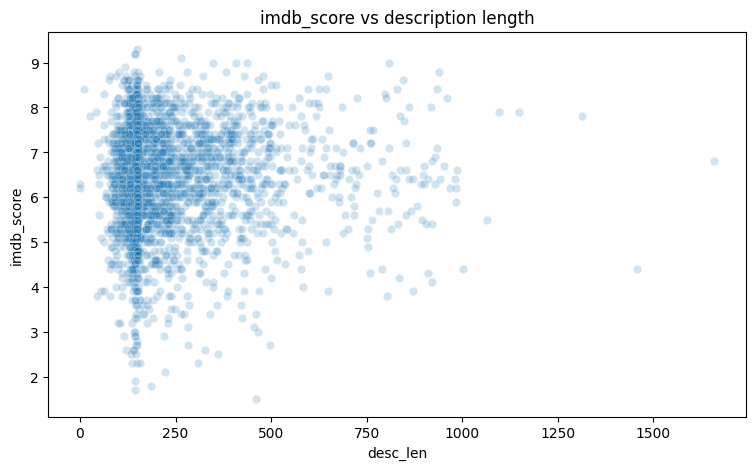

In [11]:
# Description length as a crude proxy
if "description" in df.columns:
    df["desc_len"] = df["description"].fillna("").str.len()
    sns.scatterplot(data=df, x="desc_len", y="imdb_score", alpha=0.2)
    plt.title("imdb_score vs description length")
    plt.show()
    df["desc_len"].describe()

1.	IMDb Score vs. Description Length:

		•	Strong clustering around short descriptions (100–300 characters).
		•	Very long descriptions are rare and don’t clearly correlate with higher or lower scores.
		•	Interpretation: Description length may not be a direct predictor of score, but extremely short descriptions might indicate less effort in marketing/documentation, which could indirectly link to lower production value.

12. "Give up vs Proceed" Quick Checklist

In [12]:
signals = {}

# 1) Any variance in target?
if "imdb_score" in df.columns:
    signals["score_variance_ok"] = df["imdb_score"].std() > 0.15
else:
    signals["score_variance_ok"] = False

# 2) Enough rows?
signals["enough_rows"] = len(df) >= 1000

# 3) Any predictor showing non-trivial relationship?
sig_corr = False
if {"imdb_score","imdb_votes"}.issubset(df.columns):
    sig_corr |= abs(np.corrcoef(np.log1p(df["imdb_votes"].fillna(0)), df["imdb_score"].fillna(df["imdb_score"].mean()))[0,1]) > 0.1
if {"imdb_score","runtime"}.issubset(df.columns):
    sig_corr |= abs(df[["runtime","imdb_score"]].corr().iloc[0,1]) > 0.05
signals["some_signal_present"] = bool(sig_corr)

# 4) Metadata richness: % rows with at least one of director/cast/country/rating
meta_cols = [c for c in ["director","cast","country","rating"] if c in df.columns]
if meta_cols:
    meta_rich = df[meta_cols].notna().any(axis=1).mean()
else:
    meta_rich = 0.0
signals["metadata_rich_enough"] = meta_rich >= 0.3

signals

{'score_variance_ok': np.True_,
 'enough_rows': True,
 'some_signal_present': True,
 'metadata_rich_enough': np.True_}

	•	score_variance_ok ✅ — Enough spread in IMDb scores to learn from.
	•	enough_rows ✅ — Dataset size is large enough for modeling.
	•	some_signal_present ✅ — Some features show weak-to-moderate correlations with score.
	•	metadata_rich_enough ✅ — Plenty of categorical & numerical variables for feature engineering.

## Preprocessing + Feature Engineering Plan (Strict Dataset)

Step 1 – Remove Duplicates

	•	Purpose: Avoid double-counting entries in analysis/modeling.

In [13]:
# Drop duplicates by title + release_year (keep first)
df = df.drop_duplicates(subset=["title", "release_year"], keep="first")

Step 2 – Fix Noisy Data

	•	Standardize rating, country, age_certification formats (title case, strip spaces).

In [14]:
# Example: rating contains "84 min" or similar → move to duration
mask_bad_rating = df["rating"].str.contains("min", na=False)
df.loc[mask_bad_rating, "duration"] = df.loc[mask_bad_rating, "rating"]
df.loc[mask_bad_rating, "rating"] = np.nan

Step 3 – Treat “Unknown” as Category

	•	Keeps missing metadata as an explicit category instead of discarding.

In [15]:
df["country"] = df["country"].fillna("Unknown")
df["age_certification"] = df["age_certification"].fillna("Unknown")

Step 4 – Handle Missing imdb_votes

In [16]:
# If very few missing → drop
df = df.dropna(subset=["imdb_votes"])
# OR: if many missing, impute with 0 (or 1 to avoid log issues)
#df["imdb_votes"] = df["imdb_votes"].fillna(0)

Step 5 – Extract duration_minutes

In [17]:
import re

def parse_duration(val):
    if pd.isna(val):
        return np.nan
    if "min" in val:
        return int(re.search(r"(\d+)", val).group(1))
    elif "Season" in val:
        return int(re.search(r"(\d+)", val).group(1)) * 60  # rough conversion
    return np.nan

df["duration_minutes"] = df["duration"].apply(parse_duration)

Step 6 – Log Transform imdb_votes

	•	Reduces skewness for regression models.

In [18]:
df["imdb_votes_log1p"] = np.log1p(df["imdb_votes"])

Step 7 – Binary Features

In [19]:
df["is_show"] = (df["type"] == "SHOW").astype(int)
df["is_classic"] = (df["release_year"] < 2000).astype(int)

Step 8 – Categorical Simplification

In [20]:
def collapse_rare(series, min_count=20):
    counts = series.value_counts()
    return series.where(series.isin(counts[counts >= min_count].index), "Other")

for col in ["country", "rating", "age_certification"]:
    df[col] = collapse_rare(df[col])

Step 9 – Text Features

In [21]:
df["desc_len"] = df["description"].fillna("").str.len()
# Optional: keyword counts from listed_in
df["num_genres"] = df["listed_in"].str.split(",").apply(len)

In [22]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,...,date_added,rating,duration,listed_in,desc_len,duration_minutes,imdb_votes_log1p,is_show,is_classic,num_genres
0,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Si...",1975,PG,91,tt0071853,8.2,...,"January 2, 2019",PG,92 min,"Action & Adventure, Classic Movies, Comedies",415,92,13.182288,0,1,3
1,6,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wager that he can take a flower girl and make her presentable in high soc...,1964,G,170,tt0058385,7.8,...,"April 1, 2021",Other,173 min,"Classic Movies, Music & Musicals",121,173,11.452347,0,1,2
2,7,tm98978,The Blue Lagoon,MOVIE,"Two small children and a ship's cook survive a shipwreck and find safety on an idyllic tropical island. Soon, howeve...",1980,R,104,tt0080453,5.8,...,"September 1, 2021",R,105 min,"Dramas, Romantic Movies",347,105,11.142644,0,1,2
3,8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker falls in love with an ex-con named Clyde Barrow and together they start a...",1967,R,110,tt0061418,7.7,...,"January 1, 2021",R,111 min,"Action & Adventure, Classic Movies, Dramas",190,111,11.618996,0,1,3
4,10,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an impossible mission: infiltrate an impregnable Nazi-held island and destro...,1961,Unknown,158,tt0054953,7.5,...,"September 1, 2021",TV-14,156 min,"Action & Adventure, Classic Movies",215,156,10.822794,0,1,2


In [24]:
df.shape

(3067, 26)

Step 10 – Save Clean Dataset

In [25]:
from pathlib import Path
Path("../data/processed").mkdir(parents=True, exist_ok=True)
strict_clean_path = "../data/processed/netflix_strict_clean.csv"
df.to_csv(strict_clean_path, index=False)
print(f"Saved clean strict dataset to {strict_clean_path}")

Saved clean strict dataset to ../data/processed/netflix_strict_clean.csv
